In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle

import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew 

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
ls


 El volumen de la unidad C no tiene etiqueta.
 El número de serie del volumen es: CE37-0D7E

 Directorio de C:\Users\USUARIO\Desktop\ANACONDA\clase_08

30/10/2020  09:09 p.m.    <DIR>          .
30/10/2020  09:09 p.m.    <DIR>          ..
17/10/2020  09:57 a.m.    <DIR>          .ipynb_checkpoints
30/10/2020  09:09 p.m.            24.755 clusterai2020_clase08_House_Sales_Prices_Prediction.ipynb
16/10/2020  07:42 p.m.                 1 placeholder
16/10/2020  05:44 p.m.           451.405 test.csv
16/10/2020  05:44 p.m.           460.676 train.csv
               4 archivos        936.837 bytes
               3 dirs  433.670.098.944 bytes libres


In [3]:
# el archivo de test no tiene la columna precio 
# lo que debemos hacer es dividir el train en train y test

train = pd.read_csv(r'C:\Users\USUARIO\Desktop\ANACONDA\clase_08\train.csv')
test = pd.read_csv(r'C:\Users\USUARIO\Desktop\ANACONDA\clase_08\test.csv')

In [4]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [6]:
train.shape,test.shape

((1460, 81), (1459, 80))

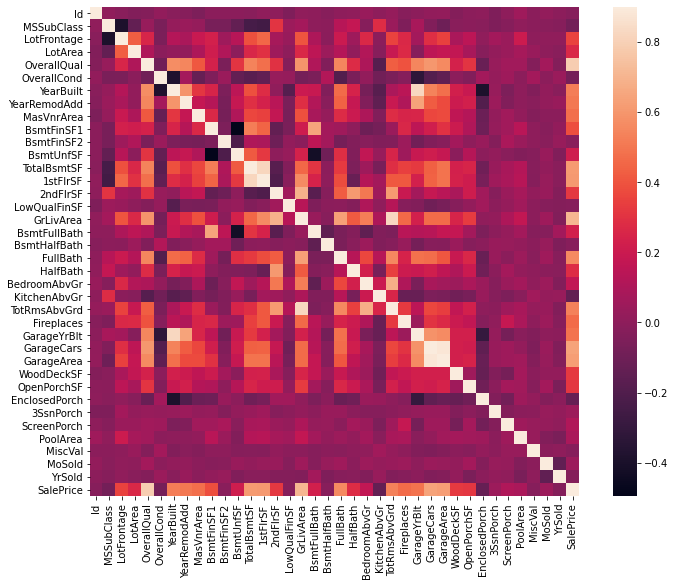

In [7]:
#Correlation map to see how features are correlated with SalePrice
# Al ser muy grande no vemos mucho
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

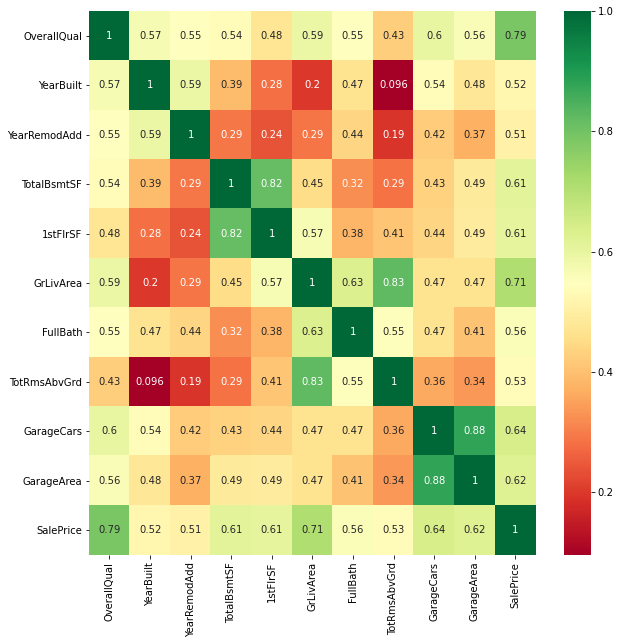

In [8]:
# most correlated features
# redudimos
corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [9]:
# hacemos un histograma. Una amplia distribucion. Se acumula mas entre 10000 y 30000
# La negra es la funciion distribucion normal



 mu = 180921.20 and sigma = 79415.29



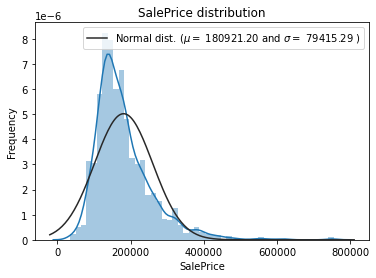

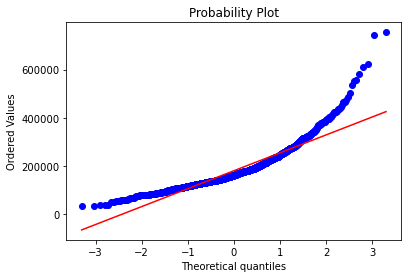

In [10]:
#Sale Price es la variable a predecir entonces vamos a graficar la distribucion de la misma 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot ---> esto compara las dos ditribuciones. la teorica vs la nuestra. Vemos que cerca de la media, son similares. 
# En una de las colas esta sesgada/ alejada. Sesgada a la derecha.

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()




 mu = 12.02 and sigma = 0.40



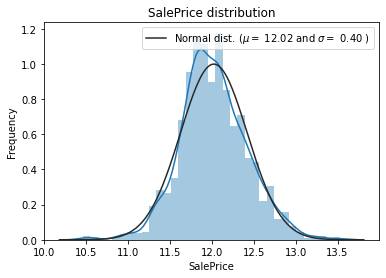

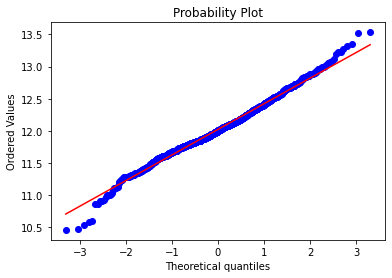

In [11]:
# Queremos centrar nuestra distribucion con la teorica.  -- > hacemos una correccion transformando los datos. (finalidad reducir el sesgo
# Empleamos la transfotmacion logaritmica para hacer esa correccion


#Vamos a hacer una transformacion logaritmica para normalizar la variable

#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

# Vemos como ahora esta mas centrada. Vamos a tener una mejor capacidad de prediccion

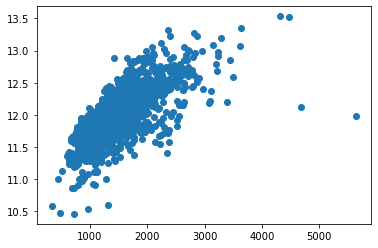

In [12]:
# Grafico entre el precio y el Area de la casa 
# Vemos puntos aislados, que so errores.
# todo lo demas, vemos que sigue uns distribucion lineal


plt.scatter(y =train.SalePrice,x = train.GrLivArea)
plt.show()
#we can see the outlier in the below image

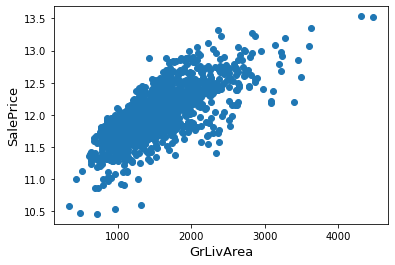

In [13]:
# eliminamos esos dos puntos aislados de abajo.
#Los borramos para que no tengamos conflicto a posteriori
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<12.5)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

# No sabemos si los dos puntos que se ven aislados, son o no ruido outlaiers
# Una forma tecnica para identificar outlaries podemos usar BOXplot y ver si se alejan mucho de la media

In [14]:
# Identificamos Variables Categoricas. Al pedir "object" me traen esas columnas.

# Differentiate numerical features (minus the target) and categorical features
categorical_features = train.select_dtypes(include=['object']).columns
categorical_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [15]:
# DISTINTAS FORMAS DE COMPLETAR NULLLS

In [16]:
#Aplicamos un tratamiento especializado para los valores nulos en cada columna

#Para los siguientes valores asumimos que al ser NA no existe la feature en la casa en cuestion.
# Entonces le colocamos "none"


train["PoolQC"] = train["PoolQC"].fillna("None")
train["MiscFeature"] = train["MiscFeature"].fillna("None")
train["Alley"] = train["Alley"].fillna("None")
train["Fence"] = train["Fence"].fillna("None")
train["FireplaceQu"] = train["FireplaceQu"].fillna("None")
train['MSSubClass'] = train['MSSubClass'].fillna("None")

#Para el area del frente lo llenamos con la media de cada barrio al entenderlos similares
# a las casas que no tienen un lote en el frente, poneme la mediana. Asumo que las casas del mismo barrio tienen el mismo panque delantero

train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

#Asumimos que los nulos en garage es por que no tienen garage
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    train[col] = train[col].fillna('None')
    
#de la misma manera
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    train[col] = train[col].fillna(0)
    
#lo mismo para el Basement-features
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train[col] = train[col].fillna('None')

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    train[col] = train[col].fillna(0)

#Similar para Masonry veneer (paredes de chapa de mamposteria)
train["MasVnrType"] = train["MasVnrType"].fillna("None")
train["MasVnrArea"] = train["MasVnrArea"].fillna(0)

#Para MSZoning el valor mas comun es RL (por lejos) entonces lo completemos con RL
train['MSZoning'] = train['MSZoning'].fillna(train['MSZoning'].mode()[0])

#Eliminamos Utilities ya que la mayoria de records son AllPub por lo que no agrega valor. 
#Como no agrega valor--> drop, eliminamos
train = train.drop(['Utilities'], axis=1)
#aprovechamos y dropeamos Id que no nos sirve tampoco
train.drop("Id", axis = 1, inplace = True)

#En la descripcion de los datos nos dice que los NA son "typical"
train["Functional"] = train["Functional"].fillna("Typ")

#Tiene un solo valor en NA, lo completamos
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])
#lo mismo para las siguientes features
train['KitchenQual'] = train['KitchenQual'].fillna(train['KitchenQual'].mode()[0])
train['Exterior1st'] = train['Exterior1st'].fillna(train['Exterior1st'].mode()[0])
train['Exterior2nd'] = train['Exterior2nd'].fillna(train['Exterior2nd'].mode()[0])
train['SaleType'] = train['SaleType'].fillna(train['SaleType'].mode()[0])

In [17]:
#Revisamos si quedaron valores nullos
train_na = (train.isnull().sum() / len(train)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :train_na})
missing_data.head()

,Missing Ratio


In [18]:
#MSSubClass=The building class
train['MSSubClass'] = train['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
train['OverallCond'] = train['OverallCond'].astype(str)

# El año no me dice nada con respecto a la casa. Es decir no vale mas que la otra por haberse vendido en el 2001 y en el 2010
# lo que hace es poner una columna por cada año.--> se agranda nuestra data

#Year and month sold are transformed into categorical features.
train['YrSold'] = train['YrSold'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)

# Año de construccion,es importante? No sabemos si cuanto mas nueva mejor. 
#lo mismo para la fecha de construccion y remodelacion
train['YearBuilt'] = train['YearBuilt'].astype(str)
train['YearRemodAdd'] = train['YearRemodAdd'].astype(str)

In [19]:
#Aplicamos LabelEncoder a las features categoricas
# por ejemplo si en una feature (columna) tiene idetificado excelente, bueno, claidad media, bajo, muy bajo. 
# A cada una de esas catergorias les asigna un numero de mayor manor.
# TIP string: letra
# float: con coma
# int: entero
# object: todo
     


cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train[c].values)) 
    train[c] = lbl.transform(list(train[c].values))

# shape        
print('Shape all_data: {}'.format(train.shape))

Shape all_data: (1458, 79)


In [20]:
train.head(8)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,9,RL,65.0,8450,1,1,3,Lvl,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,4,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,2,4,PConc,2,4,3,2,706,6,0,150,856,GasA,0,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,3,Attchd,2003.0,2,2,548,5,5,2,0,61,0,0,0,0,3,4,None,0,4,2,WD,Normal,12.247699
1,4,RL,80.0,9600,1,1,3,Lvl,FR2,0,Veenker,Feedr,Norm,1Fam,1Story,6,7,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,4,CBlock,2,4,1,0,978,6,0,284,1262,GasA,0,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,5,Attchd,1976.0,2,2,460,5,5,2,298,0,0,0,0,0,3,4,None,0,7,1,WD,Normal,12.109016
2,9,RL,68.0,11250,1,1,0,Lvl,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,4,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,2,4,PConc,2,4,2,2,486,6,0,434,920,GasA,0,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,5,Attchd,2001.0,2,2,608,5,5,2,0,42,0,0,0,0,3,4,None,0,11,2,WD,Normal,12.317171
3,10,RL,60.0,9550,1,1,0,Lvl,Corner,0,Crawfor,Norm,Norm,1Fam,2Story,7,4,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,4,BrkTil,4,1,3,0,216,6,0,540,756,GasA,2,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,Detchd,1998.0,3,3,642,5,5,2,0,35,272,0,0,0,3,4,None,0,4,0,WD,Abnorml,11.849405
4,9,RL,84.0,14260,1,1,0,Lvl,FR2,0,NoRidge,Norm,Norm,1Fam,2Story,8,4,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,2,4,PConc,2,4,0,2,655,6,0,490,1145,GasA,0,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,5,Attchd,2000.0,2,3,836,5,5,2,192,84,0,0,0,0,3,4,None,0,3,2,WD,Normal,12.429220
5,8,RL,85.0,14115,1,1,0,Lvl,Inside,0,Mitchel,Norm,Norm,1Fam,1.5Fin,5,4,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,Wood,2,4,3,2,732,6,0,64,796,GasA,0,1,SBrkr,796,566,0,1362,1,0,1,1,1,1,3,5,6,0,3,Attchd,1993.0,3,2,480,5,5,2,40,30,0,320,0,0,3,2,Shed,700,1,3,WD,Normal,11.870607
6,4,RL,75.0,10084,1,1,3,Lvl,Inside,0,Somerst,Norm,Norm,1Fam,1Story,8,4,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,2,4,PConc,0,4,0,2,1369,6,0,317,1686,GasA,0,1,SBrkr,1694,0,0,1694,1,0,2,0,3,1,2,7,6,1,2,Attchd,2004.0,2,2,636,5,5,2,255,57,0,0,0,0,3,4,None,0,10,1,WD,Normal,12.634606
7,9,RL,80.0,10382,1,1,0,Lvl,Corner,0,NWAmes,PosN,Norm,1Fam,2Story,7,5,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,3,4,CBlock,2,4,2,0,859,1,32,216,1107,GasA,0,1,SBrkr,1107,983,0,2090,1,0,2,1,3,1,3,7,6,2,5,Attchd,1973.0,2,2,484,5,5,2,235,204,228,0,0,0,3,4,Shed,350,2,3,WD,Normal,12.206078


In [21]:
#skewness
numeric_feats = train.dtypes[train.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,24.434913
PoolArea,15.932532
LotArea,12.560986
3SsnPorch,10.286510
LowQualFinSF,8.995688
LandSlope,4.805032
KitchenAbvGr,4.480268
BsmtFinSF2,4.247550
ScreenPorch,4.114690
BsmtHalfBath,4.095895


In [22]:
skewness = skewness[abs(skewness)>0.5]
skew_features = train[skewness.index]
skew_features.columns

Index(['MiscVal', 'PoolArea', 'LotArea', '3SsnPorch', 'LowQualFinSF',
       'LandSlope', 'KitchenAbvGr', 'BsmtFinSF2', 'ScreenPorch',
       'BsmtHalfBath', 'EnclosedPorch', 'MasVnrArea', 'OpenPorchSF',
       'LotFrontage', 'WoodDeckSF', 'GrLivArea', 'BsmtUnfSF', '1stFlrSF',
       '2ndFlrSF', 'BsmtFinSF1', 'OverallCond', 'HalfBath', 'TotRmsAbvGrd',
       'Fireplaces', 'BsmtFullBath', 'TotalBsmtSF', 'HeatingQC', 'FireplaceQu',
       'MSSubClass', 'BedroomAbvGr', 'OverallQual', 'GarageArea', 'SalePrice',
       'BsmtFinType1', 'YrSold', 'FullBath', 'Alley', 'GarageCars', 'BsmtQual',
       'LotShape', 'GarageFinish', 'MoSold', 'BsmtExposure', 'KitchenQual',
       'ExterQual', 'Fence', 'ExterCond', 'BsmtCond', 'BsmtFinType2',
       'GarageQual', 'PavedDrive', 'CentralAir', 'GarageCond', 'GarageYrBlt',
       'Functional', 'Street', 'PoolQC'],
      dtype='object')

In [23]:
#we can treat skewness of a feature with the help fof log transformation.so we'll apply the same here.
skew_features = np.log1p(skew_features)

In [24]:
train = pd.get_dummies(train)
print(train.shape)

(1458, 391)


In [25]:
train.head()

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,YearBuilt_1872,YearBuilt_1875,YearBuilt_1880,YearBuilt_1882,YearBuilt_1885,YearBuilt_1890,YearBuilt_1892,YearBuilt_1893,YearBuilt_1898,YearBuilt_1900,YearBuilt_1904,YearBuilt_1905,YearBuilt_1906,YearBuilt_1908,YearBuilt_1910,YearBuilt_1911,YearBuilt_1912,YearBuilt_1913,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1917,YearBuilt_1918,YearBuilt_1919,YearBuilt_1920,YearBuilt_1921,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1981,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1986,YearBuilt_1987,YearBuilt_1988,YearBuilt_1989,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,YearRemodAdd_1950,YearRemodAdd_1951,YearRemodAdd_1952,YearRemodAdd_1953,YearRemodAdd_1954,YearRemodAdd_1955,YearRemodAdd_1956,YearRemodAdd_1957,YearRemodAdd_1958,YearRemodAdd_1959,YearRemodAdd_1960,YearRemodAdd_1961,YearRemodAdd_1962,YearRemodAdd_1963,YearRemodAdd_1964,YearRemodAdd_1965,YearRemodAdd_1966,YearRemodAdd_1967,YearRemodAdd_1968,YearRemodAdd_1969,YearRemodAdd_1970,YearRemodAdd_1971,YearRemodAdd_1972,YearRemodAdd_1973,YearRemodAdd_1974,YearRemodAdd_1975,YearRemodAdd_1976,YearRemo

In [26]:
#split the data to train the model 
y = train.SalePrice
X = train.drop(['SalePrice'], axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state= 0)

In [27]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1020, 390), (438, 390), (1020,), (438,))

#### Comparar el R2, RMSE eligiendo dos de los siguientes algoritmos:

     - Linear Regressor
     - SVR 
     - KNeighborsRegressor
     - RandomForestRegressor
     - 



Mayor R2 = { }

Menor RMSE = { }

In [28]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.model_selection import GridSearchCV

In [29]:
scaler = preprocessing.StandardScaler().fit(X_train)
scaler
X_train_scal = scaler.transform(X_train)  
X_test_scal = scaler.transform(X_test)  

In [30]:
# Linear Regressor

In [31]:
lr = LinearRegression()

In [32]:
lr.fit(X_train_scal, y_train)

LinearRegression()

In [33]:
ypred = lr.predict(X_test_scal)

In [34]:
lr_RMSE=np.sqrt(mean_squared_error(y_test, ypred))
lr_RMSE

818658491849.4883

In [35]:
lr_r2 = r2_score(y_true=y_test, y_pred=ypred)
lr_r2 

-3.964550301490015e+24

In [59]:
results_df = pd.DataFrame(columns=['Modelo','R2','RMSE'])

In [60]:
results_df = results_df.append({'Modelo':'Linear Regression',
                                'R2':lr_r2 ,
                                'RMSE':lr_RMSE},ignore_index=True)

In [61]:
# KNN

In [62]:
knn = KNeighborsRegressor()
parameters_k = np.arange(20,31,5)
parameters_knn = [{'n_neighbors': parameters_k}]
n_folds = 5

In [63]:
gs = GridSearchCV(knn, param_grid=parameters_knn, cv=n_folds, refit=True, scoring="neg_mean_squared_error", verbose=3, n_jobs=3)

In [64]:
gs.fit(X_train_scal, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  15 out of  15 | elapsed:    4.0s finished


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=3,
             param_grid=[{'n_neighbors': array([20, 25, 30])}],
             scoring='neg_mean_squared_error', verbose=3)

In [65]:
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

KNeighborsRegressor(n_neighbors=20) 

{'n_neighbors': 20} 

-0.07673269805283195 



In [66]:
knn_prediction = gs.best_estimator_.predict(X_test_scal)
knn_r2 = r2_score(y_true=y_test, y_pred=knn_prediction)
knn_RMSE=np.sqrt(mean_squared_error(y_true=y_test, y_pred=knn_prediction))
knn_RMSE , knn_r2

(0.2654360201565546, 0.5832188155864786)

In [67]:
results_df = results_df.append({'Modelo':'KNN',
                                'R2':knn_r2 ,
                                'RMSE':knn_RMSE},ignore_index=True)

In [68]:
# SVR SUPPORT VECTOR REGRESSION

In [69]:
svr = SVR(max_iter=25000)
parameters_svr_rbf = [{'kernel':['rbf'] , 'C': [1,100],'gamma': [0.1,0.5] }]
gs = GridSearchCV(svr, param_grid=parameters_svr_rbf,refit=True,
                  cv=n_folds, scoring="neg_mean_squared_error",
                  verbose=3, n_jobs=3)

In [70]:
gs.fit(X_train_scal, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:   10.3s finished


GridSearchCV(cv=5, estimator=SVR(max_iter=25000), n_jobs=3,
             param_grid=[{'C': [1, 100], 'gamma': [0.1, 0.5],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=3)

In [71]:
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

SVR(C=1, gamma=0.1, max_iter=25000) 

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'} 

-0.15458590994663032 



In [72]:
svr_prediction = gs.best_estimator_.predict(X_test_scal)
svr_r2 = r2_score(y_true=y_test, y_pred=svr_prediction)
svr_RMSE=np.sqrt(mean_squared_error(y_true=y_test, y_pred=svr_prediction))
svr_mse = mean_squared_error(y_true=y_test, y_pred=svr_prediction)
svr_r2, svr_mse, svr_RMSE


(0.0032681280906058374, 0.1684961396348528, 0.4104828128373377)

In [73]:
results_df = results_df.append({'Modelo':'SVR',
                                'R2':svr_r2 ,
                                'RMSE':svr_RMSE},ignore_index=True)

In [74]:
# Random Forest Regressor

In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

est_rfr = RandomForestRegressor()

In [76]:
parameters_rfr = {'max_depth':[2,5,10],
                  'n_estimators':[100,50,10]}

gs_rfr = GridSearchCV(est_rfr, param_grid=parameters_rfr,refit=True,
                  scoring="neg_mean_squared_error",
                  verbose=3, n_jobs=3)

In [77]:
gs_rfr.fit(X_train_scal, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:   17.2s
[Parallel(n_jobs=3)]: Done  45 out of  45 | elapsed:   34.0s finished


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=3,
             param_grid={'max_depth': [2, 5, 10],
                         'n_estimators': [100, 50, 10]},
             scoring='neg_mean_squared_error', verbose=3)

In [78]:
print(gs_rfr.best_estimator_, "\n")
print(gs_rfr.best_params_, "\n")
print(gs_rfr.best_score_, "\n")

RandomForestRegressor(max_depth=10) 

{'max_depth': 10, 'n_estimators': 100} 

-0.021840268083707596 



In [79]:
random_prediction = gs_rfr.best_estimator_.predict(X_test_scal) 
random_r2 = r2_score(y_true=y_test, y_pred=random_prediction)
random_mse = mean_squared_error(y_true=y_test, y_pred=random_prediction)
random_RMSE=np.sqrt(mean_squared_error(y_true=y_test, y_pred=random_prediction))

In [80]:
results_df = results_df.append({'Modelo':'Random Forest Regressor',
                                'R2':random_r2 ,
                                'RMSE':random_RMSE},ignore_index=True)

In [81]:
display(results_df)

,Modelo,R2,RMSE
0,Linear Regression,-3.964550e+24,8.186585e+11
1,KNN,5.832188e-01,2.654360e-01
2,SVR,3.268128e-03,4.104828e-01
3,Random Forest Regressor,8.937565e-01,1.340161e-01
